In [1]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import pandas as pd
import numpy as np
import glob as glob
from scipy.interpolate import interp1d

In [13]:
dSphNames = ['CBe','DraI','RetII', 'Scl', 'SgrII', 'UMaII', 'UMi','Wil1']
#profiles=['Einasto','Burkert']
profiles=['Einasto']
channels = ['b','tau']

In [14]:
df_list = []
for name in dSphNames:
    for profile in profiles:
    
        filename = 'sv_limits_quantiles/'+name+'_'+profile+'_Decay.csv'
        df_list.append(pd.read_csv(filename))
        
df = pd.concat(df_list, ignore_index=True)
df.drop_duplicates(inplace=True)

# Rescale mass column by 1/1000 to have it in TeV
df['mass'] = df['mass'] / 1000

In [16]:
df_list_wsj = []
for name in dSphNames:
    for profile in profiles:
    
        filename_wsj = 'sv_limits_quantiles_files_wsj/'+name+'_'+profile+'_Decay_wsj.csv'
        df_list_wsj.append(pd.read_csv(filename_wsj))
        
df_wsj = pd.concat(df_list_wsj, ignore_index=True)
df_wsj.drop_duplicates(inplace=True)

# Rescale mass column by 1/1000 to have it in TeV
df_wsj['mass'] = df_wsj['mass'] / 1000

In [17]:
#df_list = []
#for name in dSphNames:
#    for profile in profiles:
#    
#        filename = 'sv_limits_files/'+name+'_'+profile+'_Decay.csv'
#        df_list.append(pd.read_csv(filename))
        
#df_decay_single = pd.concat(df_list, ignore_index=True)
#df_decay_single.drop_duplicates(inplace=True)
##

# Rescale mass column by 1/1000 to have it in TeV
#df_decay_single['mass'] = df_decay_single['mass'] / 1000

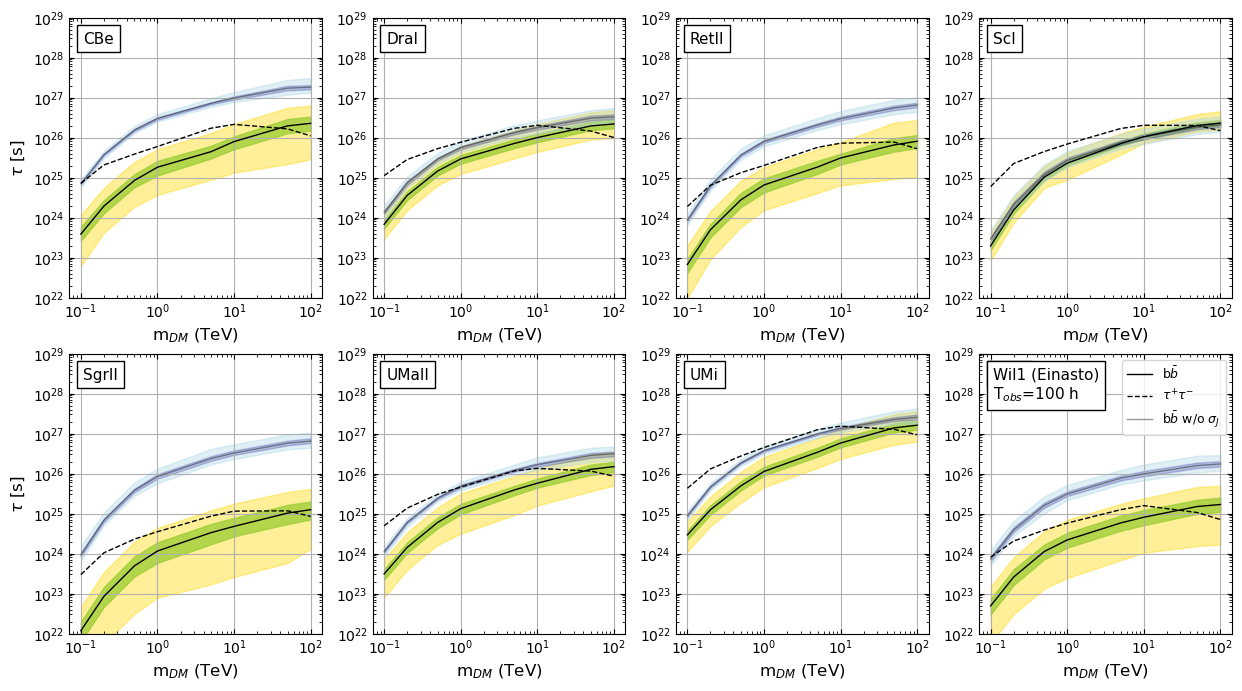

In [24]:
fig = plt.figure(figsize=(15, 8))

#dSphNames = ['DraI', 'Wil1', 'CBe']
#color = ['black','black','black']
channels = ['b']
profile = 'Einasto'

contador = 1
for name in dSphNames:
    
   
    plt.subplot(2, 4, contador)
    contador = contador + 1
    
    scale = 1
    mask_dw = (df_wsj['mass']>90*1e-3) & (df_wsj['quantile'] == 0.05) & (df_wsj['name']==name) & (df_wsj['ch']=='b') & (df_wsj['profile']==profile)
    mask_up = (df_wsj['mass']>90*1e-3) & (df_wsj['quantile'] == 0.95) & (df_wsj['name']==name) & (df_wsj['ch']=='b') & (df_wsj['profile']==profile)
    plt.fill_between(df_wsj[mask_dw]['mass'],
                     df_wsj[mask_up]['tau']*scale,
                     df_wsj[mask_dw]['tau']*scale, color='gold', alpha=0.4)


    mask_dw = (df_wsj['mass']>90*1e-3) & (df_wsj['quantile'] == 0.32) & (df_wsj['name']==name) & (df_wsj['ch']=='b') & (df_wsj['profile']==profile)
    mask_up = (df_wsj['mass']>90*1e-3) & (df_wsj['quantile'] == 0.68) & (df_wsj['name']==name) & (df_wsj['ch']=='b') & (df_wsj['profile']==profile)
    plt.fill_between(df_wsj[mask_dw]['mass'],
                     df_wsj[mask_up]['tau']*scale,
                     df_wsj[mask_dw]['tau']*scale, color='yellowgreen', alpha=0.75)
    
    
    
    mask = (df_wsj['mass']>90*1e-3) & (df_wsj['quantile'] == 0.5) & (df_wsj['name']==name) & (df_wsj['profile']==profile) & (df_wsj['ch']=='b')
    plt.loglog(df_wsj[mask]['mass'],df_wsj[mask]['tau']*scale, 
               ls='-', linewidth=1, color='black',
               #marker='o',
               label=r'b$\bar{b}$') 
    
    
    mask = (df_wsj['mass']>90*1e-3) & (df_wsj['quantile'] == 0.5) & (df_wsj['name']==name) & (df_wsj['profile']==profile) & (df_wsj['ch']=='tau')
    plt.loglog(df_wsj[mask]['mass'],df_wsj[mask]['tau']*scale, 
               ls='--', linewidth=1, color='black',
               #marker='o',
               label=r'$\tau^{+}\tau^{-}$') 
    


#
    #
    #
    #
    mask_dw = (df['mass']>90*1e-3) & (df['quantile'] == 0.05) & (df['name']==name) & (df['ch']=='b') & (df['profile']==profile)
    mask_up = (df['mass']>90*1e-3) & (df['quantile'] == 0.95) & (df['name']==name) & (df['ch']=='b') & (df['profile']==profile)
    plt.fill_between(df[mask_dw]['mass'],
                     df[mask_up]['tau']*scale,
                     df[mask_dw]['tau']*scale, color='lightblue', alpha=0.4)


    mask_dw = (df['mass']>90*1e-3) & (df['quantile'] == 0.32) & (df['name']==name) & (df['ch']=='b') & (df['profile']==profile)
    mask_up = (df['mass']>90*1e-3) & (df['quantile'] == 0.68) & (df['name']==name) & (df['ch']=='b') & (df['profile']==profile)
    plt.fill_between(df[mask_dw]['mass'],
                     df[mask_up]['tau']*scale,
                     df[mask_dw]['tau']*scale, color='darkblue', alpha=0.2)
    
    
    
    mask = (df['mass']>90*1e-3) & (df['quantile'] == 0.5) & (df['name']==name) & (df['profile']==profile) & (df['ch']=='b')
    plt.loglog(df[mask]['mass'],df[mask]['tau']*scale, 
               ls='-', linewidth=1, color='black',
               alpha=0.4,
               label=r'b$\bar{b}$ w/o $\sigma_J$') 

    

    ax = plt.gca()
    at = AnchoredText(name,loc='upper left', prop=dict(size=11), frameon=True)
    ax.add_artist(at)    

    if contador-1 == 8:
        plt.legend(loc='upper right',fontsize=9)
        #ax = plt.gca()
#        at = AnchoredText(name+' (Einasto)'+"\n"+r"T$_{obs}$=100 h",
        at2 = AnchoredText(name+' (Einasto)'+"\n"+r"T$_{obs}$=100 h",
              loc='upper left', prop=dict(size=11), frameon=True)
        ax.add_artist(at2) 



    
    #plt.legend(loc='upper right', fontsize=12)
    #ax = plt.gca()
    #at = AnchoredText(name+"\n"+r"T$_{obs}$=100 h",
    #          loc='upper left', prop=dict(size=12), frameon=True)
    
    #at1 = AnchoredText("Einasto",loc='lower right',
    #           prop=dict(size=12,color='black'), frameon=True)
    #at2 = AnchoredText("Burkert",loc='lower right',
    #           prop=dict(size=12,color='blue'), frameon=True)
    

    
   
    #ax.add_artist(at1)
    #ax.add_artist(at2)
    
    plt.grid()
    plt.ylim(1e22,1e29)
    
    if contador-1 == 1 or  contador-1 == 5:
        plt.ylabel(r"$\tau$ [s]", fontsize=12)
        
    plt.xlabel("m$_{DM}$ (TeV)", fontsize=12)

    plt.tick_params(which='both', direction='in', top=True, right=True)

plt.savefig('dsph8_dec_bb_tau.png', bbox_inches='tight', pad_inches=0.3)